<a href="https://colab.research.google.com/github/HikaruEgashira/data_science_practice/blob/master/Kaggle/titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# タイタニック生存者予測

google colabでKaggleやります。
まずドライブにアクセスします。

In [153]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


!をつけるとUNIXコマンドが使えます。

In [154]:
path = 'drive/My Drive/Private/workspace/python/kaggle/titanic'
!ls 'drive/My Drive/Private/workspace/python/kaggle/titanic'

gender_submission.csv  test.csv  titanic.ipynb	train.csv


In [0]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

%matplotlib inline

In [0]:
# pandasでcsvデータを読み込み
train = pd.read_csv(path + '/train.csv')
test = pd.read_csv(path + '/test.csv')
submit = pd.read_csv(path + '/gender_submission.csv')

In [157]:
# head関数で先頭5つのデータを確認
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [158]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [159]:
submit.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [160]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [161]:
# df["Age"].fillna(df.Age.median(), inplace=True)する前に
train['Survived'].sum() / train['Survived'].count()

0.3838383838383838

In [162]:
train[train['Age'].isnull()]['Survived'].sum() / train['Age'].isnull().sum()

0.2937853107344633

([array([13., 13.,  8., 63., 80., 66., 47., 39., 30., 23., 14., 11., 10.,
          3.,  4.,  0.]),
  array([ 44.,  20.,  19.,  96., 122., 108.,  88.,  67.,  47.,  39.,  24.,
          18.,  14.,   3.,   4.,   1.])],
 array([ 0.42   ,  5.39375, 10.3675 , 15.34125, 20.315  , 25.28875,
        30.2625 , 35.23625, 40.21   , 45.18375, 50.1575 , 55.13125,
        60.105  , 65.07875, 70.0525 , 75.02625, 80.     ]),
 <a list of 2 Lists of Patches objects>)

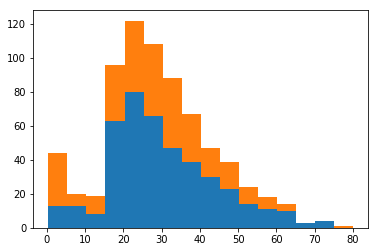

In [163]:
split_data = []
for survived in [0,1]:
    split_data.append(train[train.Survived==survived])
temp = [i["Age"].dropna() for i in split_data]
plt.hist(temp, histtype="barstacked", bins=16)

In [164]:
train.Age.median()

28.0

In [165]:
train[train['Age'] == 28]['Survived'].sum() / train[train['Age'] == 28]['Survived'].count()

0.28

In [0]:
train["Age"].fillna(train.Age.median(), inplace=True)

In [0]:
train = train.replace("male",0).replace("female",1)
test = test.replace("male",0).replace("female",1)

In [168]:
train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [0]:
train = train.replace("S", 0).replace("C", 1).replace("Q", 2)
test = test.replace("S", 0).replace("C", 1).replace("Q", 2)

In [0]:
train2 = train.drop(["Name", "Ticket", "Fare", "Cabin"], axis=1)

In [0]:
train2 = train2.fillna(0)

In [172]:
train2.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Embarked       0
dtype: int64

In [173]:
train2.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,1,0,3,0,22.0,1,0,0.0
1,2,1,1,1,38.0,1,0,1.0
2,3,1,3,1,26.0,0,0,0.0
3,4,1,1,1,35.0,1,0,0.0
4,5,0,3,0,35.0,0,0,0.0


In [0]:
from sklearn.tree import DecisionTreeClassifier as DT
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV

In [0]:
trainX = train2.iloc[:, 2:8]
y = train2["Survived"]

In [0]:
testX = test.drop(["PassengerId", "Name", "Ticket", "Fare", "Cabin"], axis=1)

In [177]:
testX.head()

,Pclass,Sex,Age,SibSp,Parch,Embarked
0,3,0,34.5,0,0,2
1,3,1,47.0,1,0,0
2,2,0,62.0,0,0,2
3,3,0,27.0,0,0,0
4,3,1,22.0,1,1,0


In [178]:
trainX.head()

,Pclass,Sex,Age,SibSp,Parch,Embarked
0,3,0,22.0,1,0,0.0
1,1,1,38.0,1,0,1.0
2,3,1,26.0,0,0,0.0
3,1,1,35.0,1,0,0.0
4,3,0,35.0,0,0,0.0


In [0]:
trainX = pd.get_dummies(trainX)
testX = pd.get_dummies(testX)

In [201]:
clf1 = DT(max_depth = 4, min_samples_leaf = 71)
cross_validate(clf1, trainX, y, cv = 5, scoring = "roc_auc", n_jobs = -1)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


{'fit_time': array([0.00501466, 0.00375724, 0.00311923, 0.00294852, 0.00384283]),
 'score_time': array([0.00232649, 0.00249743, 0.0029757 , 0.0022316 , 0.0028038 ]),
 'test_score': array([0.83682477, 0.84657444, 0.8519385 , 0.84351604, 0.86575823]),
 'train_score': array([0.85207389, 0.84921191, 0.84824086, 0.850419  , 0.84494443])}

In [207]:
clf3 = DT()
parameters = {'max_depth': list(range(2, 8)), 'min_samples_leaf': list(range(40, 110))}
gcv = GridSearchCV(clf3, parameters, cv = 5, scoring='roc_auc', n_jobs=-1)
gcv.fit(trainX, y)
gcv.best_params_

{'max_depth': 5, 'min_samples_leaf': 43}

In [0]:
testX = testX.fillna(0)
pred2 = gcv.predict_proba(testX)
submit["Survived"] = (pred2[:, 1] > 0.5).astype(int)
submit.to_csv(path + '/submit.csv', index = None)

In [197]:
submit.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
